# Analyzing vehicle and pedestrian stops from law enforcement departments across Rhode Island

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'load the data'
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/police_ri.csv'
ri = pd.read_csv(url, parse_dates={'stop_datetime': ['stop_date','stop_time']})

The 'ri' DataFrame contains data on vehicle and pedestrian stops from law enforcement departments across the state of Rhode Island.
This dataset has been obtained from the [Standford Open Police Project](https://openpolicing.stanford.edu/).

In [3]:
ri.columns

Index(['stop_datetime', 'county_name', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [4]:
ri.head()

,stop_datetime,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02 01:55:00,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18 08:15:00,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23 23:15:00,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20 17:15:00,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14 10:00:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


Remove the column that only contains missing values

In [5]:
ri.isna().sum()

stop_datetime             0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [6]:
ri.shape

(91741, 14)

In [7]:
ri.drop('county_name',axis=1, inplace=True)

**Part 2:** Do men or women speed more often?

Men speed more

In [8]:
ri[ri.violation=='Speeding'].groupby('driver_gender').violation.count()

driver_gender
F    15482
M    32979
Name: violation, dtype: int64

**Part 3:** Does gender affect who gets searched during a stop?

Male drivers get searched significatly more than women

In [9]:
ri[ri.violation=='Speeding'].groupby('driver_gender').search_conducted.sum()

driver_gender
F    135
M    822
Name: search_conducted, dtype: int64

**Part 4:** Why is search_type missing so often?

search_type is missing whenever no search was conducted

In [10]:
ri[ri.search_conducted==0].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [11]:
ri[ri.search_conducted==1].search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Frisk                                    11
Incident to Arrest,Invent

**Part 5:** During a search, how often is the driver frisked?

People are frisked 8.57% of the time

In [12]:
totalfrisk=ri[(ri.search_conducted==1)&(ri.search_type.str.contains('Frisk'))].search_type.value_counts().sum()
totalfrisk

274

In [13]:
totalsearch=ri[ri.search_conducted==1].search_type.value_counts().sum()
totalsearch

3196

In [14]:
pct_frisk=100*(totalfrisk/totalsearch)
pct_frisk

8.573216520650814

**Part 6:**  Which year had the least number of stops?

2005 had the least number of stops

In [15]:
ri.stop_datetime=pd.to_datetime(ri.stop_datetime)

In [16]:
ri.set_index(ri.stop_datetime,inplace=True)

<AxesSubplot:ylabel='stop_datetime'>

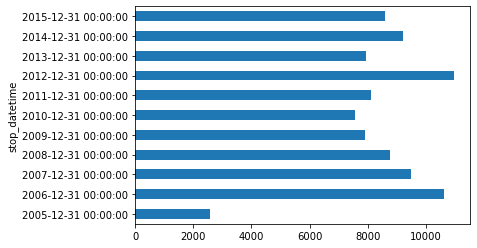

In [17]:
ri.resample('Y').stop_datetime.count().plot(kind='barh')

**Part 7:** How does drug activity change by time of day?

## Drug related stops are the highest in the middle of the night

In [18]:
ri[ri.drugs_related_stop!=0].drugs_related_stop.count()

815

In [19]:
drugstops=ri[ri.drugs_related_stop!=0]
drugstops

,stop_datetime,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
stop_datetime,,,,,,,,,,,,,
2005-10-01 00:00:00,2005-10-01 00:00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Arrest Driver,True,16-30 Min,True
2005-10-01 00:00:00,2005-10-01 00:00:00,M,1988.0,17.0,White,Equipment/Inspection Violation,Equipment,True,Probable Cause,Citation,False,30+ Min,True
2005-10-04 01:20:00,2005-10-04 01:20:00,M,1956.0,49.0,White,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,True
2005-10-05 00:20:00,2005-10-05 00:20:00,M,1980.0,25.0,Black,Equipment/Inspection Violation,Equipment,True,"Probable Cause,Reasonable Suspicion",Arrest Driver,True,16-30 Min,True
2005-10-07 23:30:00,2005-10-07 23:30:00,M,1986.0,19.0,White,Suspicious Person,Other,True,Probable Cause,Arrest Passenger,True,16-30 Min,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-03 14:48:00,2015-12-03 14:48:00,M,1991.0,24.0,Hispanic,Other Traffic Violation,Moving violation,True,Inventory,Citation,False,16-30 Min,True
2015-12-06 10:33:00,2015-12-06 10:33:00,M,1993.0,22.0,Hispanic,Speeding,Speeding,True,Protective Frisk,Citation,False,16-30 Min,True
2015-12-07 14:10:00,2015-12-07 14:10:00,M,1976.0,39.0,White,Other Traffic Violation,Moving violation,True,Probable Cause,Arrest Passenger,True,30+ Min,True


In [20]:
table = drugstops.pivot_table(values='stop_datetime',index=drugstops.index.hour ,columns='drugs_related_stop',aggfunc='count')
table

drugs_related_stop,True
stop_datetime,
0,103
1,60
2,46
3,20
4,3
5,1
6,10
7,15
8,14


<AxesSubplot:>

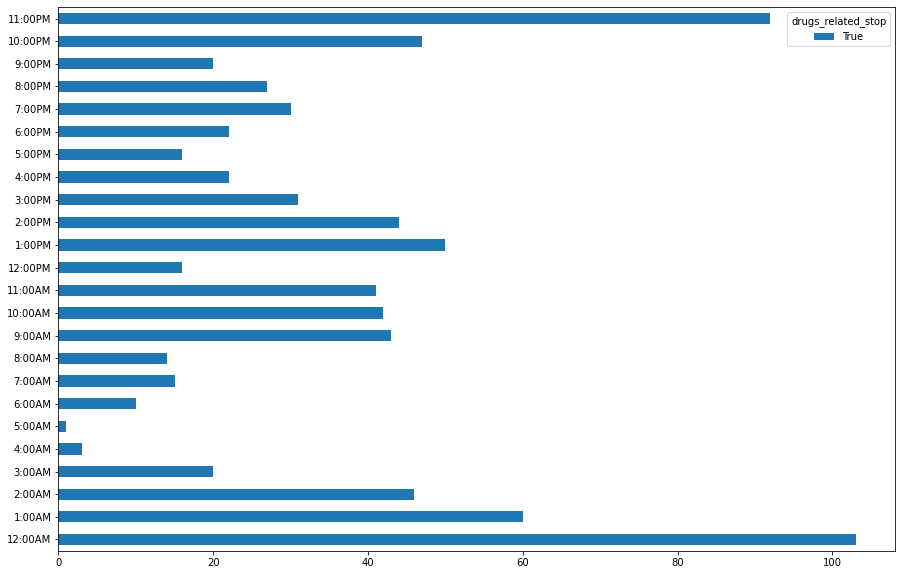

In [21]:
table.index=['12:00AM','1:00AM','2:00AM','3:00AM','4:00AM','5:00AM','6:00AM','7:00AM','8:00AM','9:00AM','10:00AM','11:00AM','12:00PM','1:00PM','2:00PM','3:00PM','4:00PM','5:00PM','6:00PM','7:00PM','8:00PM','9:00PM','10:00PM','11:00PM']
table.plot(kind='barh',figsize= (15,10))


**Part 8:** Do most stops occur at night?

<AxesSubplot:>

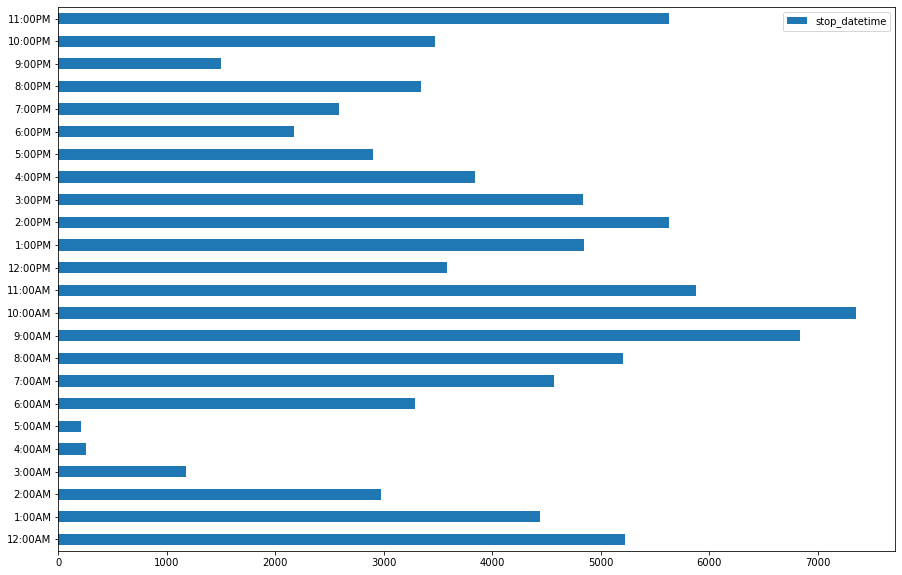

In [22]:
table = ri.pivot_table(values='stop_datetime',index=ri.index.hour ,aggfunc='count')
table
table.index=['12:00AM','1:00AM','2:00AM','3:00AM','4:00AM','5:00AM','6:00AM','7:00AM','8:00AM','9:00AM','10:00AM','11:00AM','12:00PM','1:00PM','2:00PM','3:00PM','4:00PM','5:00PM','6:00PM','7:00PM','8:00PM','9:00PM','10:00PM','11:00PM']
table.plot(kind='barh',figsize= (15,10))

**Part 9:** Find the bad data in the stop_duration column and fix it

In [23]:
ri.stop_duration

stop_datetime
2005-01-02 01:55:00     0-15 Min
2005-01-18 08:15:00     0-15 Min
2005-01-23 23:15:00     0-15 Min
2005-02-20 17:15:00    16-30 Min
2005-03-14 10:00:00     0-15 Min
                         ...    
2015-12-31 20:27:00     0-15 Min
2015-12-31 20:35:00     0-15 Min
2015-12-31 20:45:00     0-15 Min
2015-12-31 21:42:00     0-15 Min
2015-12-31 22:46:00     0-15 Min
Name: stop_duration, Length: 91741, dtype: object

In [24]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [25]:
ri.drop(ri[(ri.stop_duration =='1')|(ri.stop_duration =='2')].index,inplace=True)
##ri.loc[ri.stop_duration=='1']


In [26]:
dic={'0-15 Min': 7,'16-30 Min': 23,'30+ Min': 40}

In [27]:
ri['stop_time']=ri.stop_duration.map(dic)

In [28]:
ri.head(10)

,stop_datetime,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_time
stop_datetime,,,,,,,,,,,,,,
2005-01-02 01:55:00,2005-01-02 01:55:00,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.0
2005-01-18 08:15:00,2005-01-18 08:15:00,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.0
2005-01-23 23:15:00,2005-01-23 23:15:00,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.0
2005-02-20 17:15:00,2005-02-20 17:15:00,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,23.0
2005-03-14 10:00:00,2005-03-14 10:00:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.0
2005-03-23 09:45:00,2005-03-23 09:45:00,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,7.0
2005-04-01 17:30:00,2005-04-01 17:30:00,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.0
2005-06-06 13:20:00,2005-06-06 13:20:00,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.0
2005-07-13 10:15:00,2005-07-13 10:15:00,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.0


**Part 10:** What is the mean stop_duration for each violation_raw?

In [29]:
ri.groupby(ri.violation_raw).stop_time.mean()

violation_raw
APB                                 19.379747
Call for Service                    20.395994
Equipment/Inspection Violation      10.412886
Motorist Assist/Courtesy            15.714286
Other Traffic Violation             12.771436
Registration Violation              12.738636
Seatbelt Violation                   8.774390
Special Detail/Directed Patrol      13.952342
Speeding                             9.669473
Suspicious Person                   17.196429
Violation of City/Town Ordinance    12.563981
Warrant                             20.000000
Name: stop_time, dtype: float64

Compare the age distributions for each violation

In [30]:
ri.groupby(ri.violation_raw).driver_age.value_counts().unstack()

driver_age,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,...,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,94.0,99.0
violation_raw,,,,,,,,,,,,,,,,,,,,,
APB,NaN,NaN,NaN,1.0,1.0,NaN,8.0,4.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Call for Service,NaN,2.0,8.0,22.0,50.0,61.0,56.0,68.0,48.0,64.0,...,1.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
Equipment/Inspection Violation,NaN,5.0,56.0,200.0,457.0,540.0,623.0,601.0,664.0,572.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Motorist Assist/Courtesy,NaN,NaN,1.0,3.0,2.0,5.0,5.0,14.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Traffic Violation,4.0,7.0,77.0,231.0,447.0,554.0,634.0,630.0,666.0,597.0,...,1.0,3.0,3.0,2.0,2.0,NaN,NaN,NaN,1.0,1.0
Registration Violation,NaN,5.0,10.0,48.0,93.0,147.0,144.0,182.0,167.0,164.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seatbelt Violation,NaN,NaN,8.0,39.0,79.0,105.0,152.0,142.0,157.0,169.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Special Detail/Directed Patrol,NaN,NaN,1.0,3.0,13.0,12.0,17.0,17.0,27.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Speeding,1.0,26.0,424.0,1181.0,2074.0,2354.0,2412.0,2453.0,2242.0,2168.0,...,4.0,6.0,2.0,4.0,2.0,2.0,NaN,1.0,NaN,NaN


<AxesSubplot:xlabel='violation_raw'>

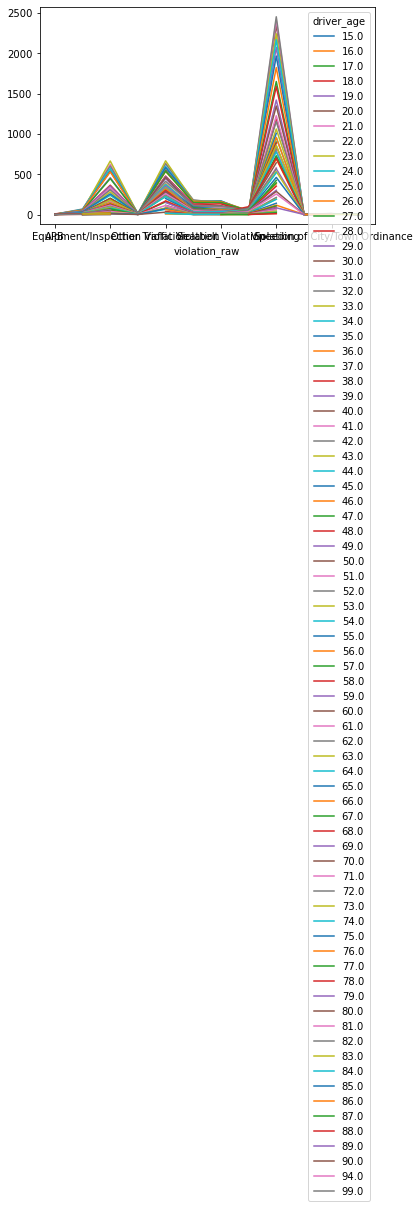

In [31]:
ri.groupby(ri.violation_raw).driver_age.value_counts().unstack().plot()